# Suicide Rates Analysis (1985–2016)

## Introduction

This project analyzes the **Suicide Rates Overview (1985–2016)** dataset from Kaggle. The goal is to explore suicide trends across different years, age groups, and countries, providing insights into patterns and possible influencing factors. 

### **Objectives**
1. **Data Exploration** – Understand the distribution of suicide rates across various demographics.

2. **Data Visualization** – Create insightful visualizations such as bar charts, histograms, and box plots.

3. **Statistical Analysis** – Compute key descriptive statistics (mean, median, IQR, etc.).
 
4. **Central Limit Theorem** - Apply CLT on number of suicides per year per country showing that the sample mean indeed follows the normal distribution.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.cm as cm
from IPython.display import display, HTML
import seaborn as sns

## Loading and Exploring the Dataset

In [2]:
# Load dataset
df = pd.read_csv('master.csv')
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Let's explore the dataset by printing the column names and checking unique values.

In [3]:
# Display all column names
print("Columns in the dataset:")
print(*list(df.columns), sep = '\n')
print("\n")

# Display unique values for each column
print("Number of unique values under each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values.")

Columns in the dataset:
country
year
sex
age
suicides_no
population
suicides/100k pop
country-year
HDI for year
 gdp_for_year ($) 
gdp_per_capita ($)
generation


Number of unique values under each column:
country: 101 unique values.
year: 32 unique values.
sex: 2 unique values.
age: 6 unique values.
suicides_no: 2084 unique values.
population: 25564 unique values.
suicides/100k pop: 5298 unique values.
country-year: 2321 unique values.
HDI for year: 305 unique values.
 gdp_for_year ($) : 2321 unique values.
gdp_per_capita ($): 2233 unique values.
generation: 6 unique values.


### **Dataset Description**
- The dataset contains suicide statistics from 101 countries spanning 1985 to 2016.
- It includes attributes such as:
  - `country` – Name of the country
  - `year` – The year of recorded suicides
  - `sex` – Gender of the individuals
  - `age` – Age group (e.g., 15-24 years, 35-54 years, etc.)
  - `suicides_no` – Number of suicides reported
  - `population` – Population of that group in that year
  - `suicides/100k pop` – Suicide rate per 100,000 individuals
  - `country_year` - The first two columns paired into one string
  - `HDI` - Human Development Index
  - `gdp_for_year ($)` – GDP for the country in that year
  - `gdp_per_capita ($)` – GDP per capita for the country in that year
  - `generation` – Generation classification (e.g., Silent, Boomers, Gen X)

## Data Cleaning
Some quick EDA to see if there's any data that can skew the results.

The main removal will be from removing the countries that don't have atleast 50% of the years.
We will also check for any age groups that are missing as well.
And for safety, we manually set the suicides/100k population again.

But first, we'll check for missing and duplicate values.

In [4]:
print("The number of missing values per column:")
print(df.isnull().sum())
print("--------------------------------------------\nThe number of duplicate rows are:")
print(df.duplicated().sum())

The number of missing values per column:
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64
--------------------------------------------
The number of duplicate rows are:
0


We'll chose to ignore the HDI column as not sufficient inferences can be made from it.

Now, we tackle the countries that don't have data for all the required years.

In [5]:
# Define threshold: Keep countries with data for at least 50% of the years (adjustable)
min_years = int(0.5 * (2016 - 1985 + 1))  # 50% of 32 years

# Count available years per country
country_year_counts = df.groupby("country")["year"].nunique()
print(country_year_counts)

# Filter out countries with too few years
valid_countries = country_year_counts[country_year_counts >= min_years].index
df = df[df["country"].isin(valid_countries)]

# Counting available years per country again (and noting the difference in lengths of outputs)
country_year_counts = df.groupby("country")["year"].nunique()
print(country_year_counts)

country
Albania                 22
Antigua and Barbuda     27
Argentina               31
Armenia                 25
Aruba                   14
                        ..
United Arab Emirates     6
United Kingdom          31
United States           31
Uruguay                 28
Uzbekistan              22
Name: year, Length: 101, dtype: int64
country
Albania                22
Antigua and Barbuda    27
Argentina              31
Armenia                25
Australia              30
                       ..
Ukraine                28
United Kingdom         31
United States          31
Uruguay                28
Uzbekistan             22
Name: year, Length: 81, dtype: int64


We've removed 20 countries with insufficient data for their years. 

Now, we'll check for missing age groups.

In [6]:
# List of expected age groups
expected_age_groups = set(df["age"].unique())  # Or manually set: {"5-14 years", "15-24 years", ...}

# Count available age groups per country
country_age_counts = df.groupby("country")["age"].nunique()
print(country_age_counts)

# Keep countries with all expected age groups
valid_countries = country_age_counts[country_age_counts >= len(expected_age_groups)].index
df = df[df["country"].isin(valid_countries)]

# Count available age groups per country and compare difference
country_age_counts = df.groupby("country")["age"].nunique()
print(country_age_counts)

country
Albania                6
Antigua and Barbuda    6
Argentina              6
Armenia                6
Australia              6
                      ..
Ukraine                6
United Kingdom         6
United States          6
Uruguay                6
Uzbekistan             6
Name: age, Length: 81, dtype: int64
country
Albania                6
Antigua and Barbuda    6
Argentina              6
Armenia                6
Australia              6
                      ..
Ukraine                6
United Kingdom         6
United States          6
Uruguay                6
Uzbekistan             6
Name: age, Length: 81, dtype: int64


Clearly, no missing age groups.

In [7]:
# Confirming the values of the suicides/100k pop column.
df["suicides/100k pop"] = (df["suicides_no"] / df["population"]) * 100000

In [8]:
print(f"Number of rows/data points in the dataset : {df.shape[0]}")

Number of rows/data points in the dataset : 26074


We aggregate the data to compute the total number of suicides along different dimensions:

- **Per Year**: Total suicides for each year.
- **Per Country**: Total suicides for each country.
- **Per Generation**: Total suicides for each generation.

In [9]:
# Suicides by country
suicides_by_country = df.groupby('country')['suicides_no'].sum().reset_index()
suicides_by_country = suicides_by_country.sort_values(by='suicides_no', ascending=False)
display(HTML(suicides_by_country.head().to_html()))
print(f"Number of countries :  {suicides_by_country.shape[0]}")

,country,suicides_no
60,Russian Federation,1209742
78,United States,1034013
40,Japan,806902
27,France,329127
76,Ukraine,319950


Number of countries :  81


In [10]:
# Suicides by year
suicides_by_year = df.groupby('year')['suicides_no'].sum().reset_index()
suicides_by_year = suicides_by_year.sort_values(by='suicides_no', ascending=False)
display(HTML(suicides_by_year.head().to_html()))
print(f"Number of years :  {suicides_by_year.shape[0]}")

,year,suicides_no
17,2002,250358
18,2003,250052
14,1999,249445
15,2000,249159
16,2001,244792


Number of years :  32


In [11]:
# Suicides by generation
suicides_by_generation = df.groupby('generation')['suicides_no'].sum().reset_index()
suicides_by_generation = suicides_by_generation.sort_values(by='suicides_no', ascending=False)
display(HTML(suicides_by_generation.to_html()))
print(f"Number of generations :  {suicides_by_generation.shape[0]}")

,generation,suicides_no
0,Boomers,2258545
5,Silent,1767982
2,Generation X,1499046
4,Millenials,607687
1,G.I. Generation,507361
3,Generation Z,15279


Number of generations :  6


# Part 1

## Bar diagrams

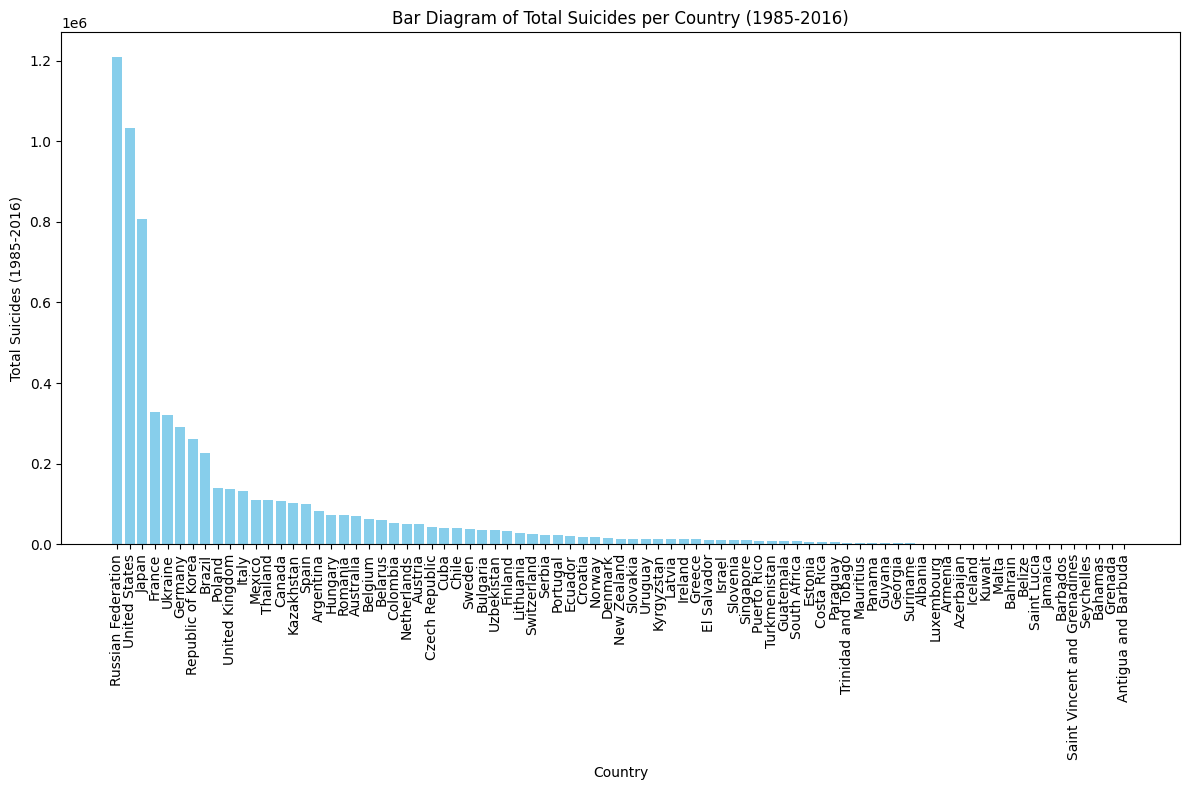

In [12]:
# Bar diagram for total suicides per country (1985-2016)
plt.figure(figsize=(12, 8))
plt.bar(suicides_by_country['country'], suicides_by_country['suicides_no'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Suicides (1985-2016)')
plt.title('Bar Diagram of Total Suicides per Country (1985-2016)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

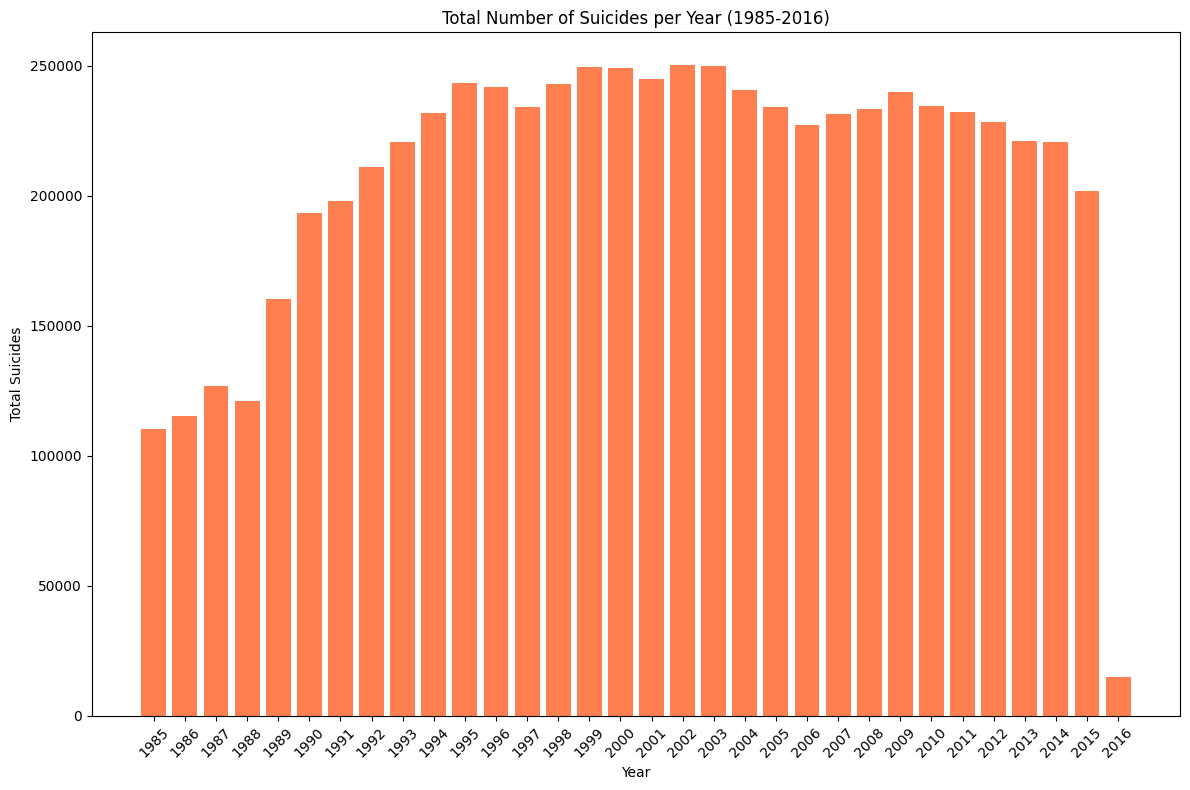

In [13]:
# Bar diagram for total suicides per year
plt.figure(figsize=(12, 8))
plt.bar(suicides_by_year['year'], suicides_by_year['suicides_no'], color='coral')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title('Total Number of Suicides per Year (1985-2016)')
plt.xticks(suicides_by_year['year'], rotation=45)
plt.tight_layout()
plt.show()

The suicide count in 2016 seems unusually low compared to other years, this might be becuase of the data for 2016 being incomplete/collected in middle of the year

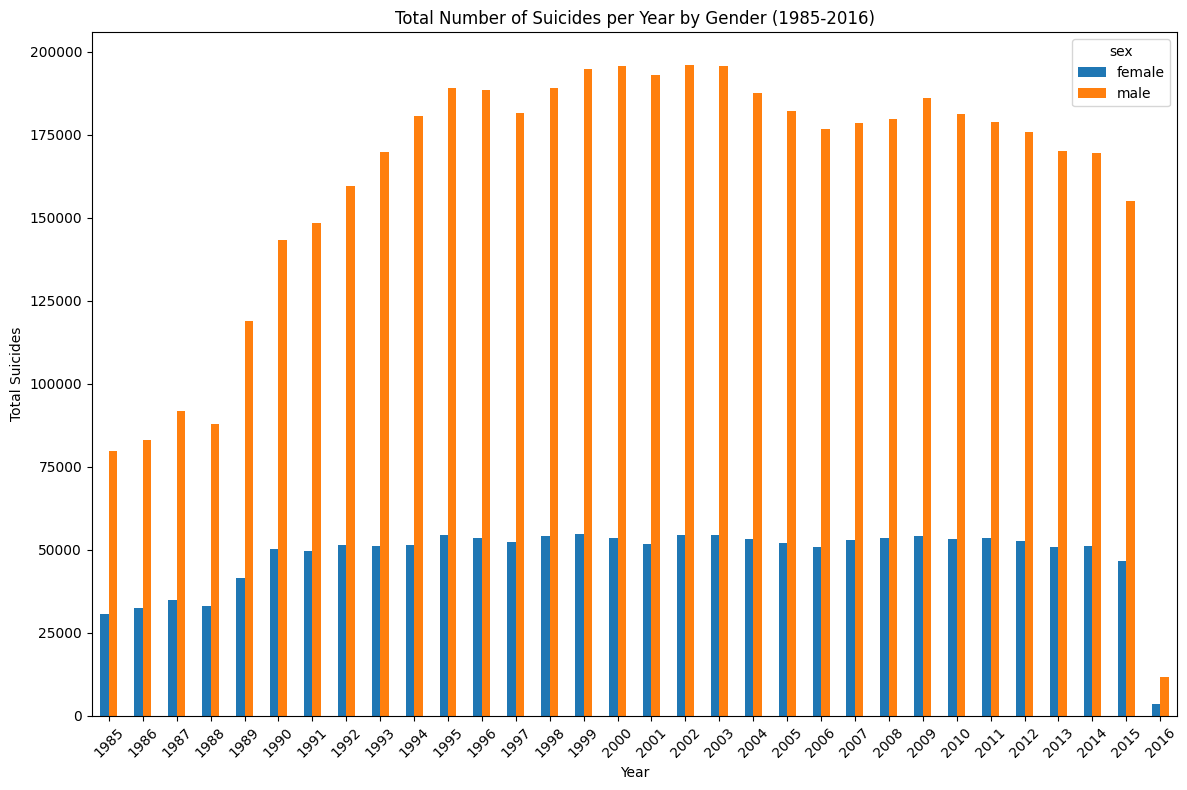

In [14]:
suicides_by_year_gender = df.groupby(['year', 'sex'])['suicides_no'].sum().reset_index()

pivot_gender = suicides_by_year_gender.pivot(index='year', columns='sex', values='suicides_no')

pivot_gender.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title('Total Number of Suicides per Year by Gender (1985-2016)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Male suicide count is a little more than double of female suicide count consistently in all the years

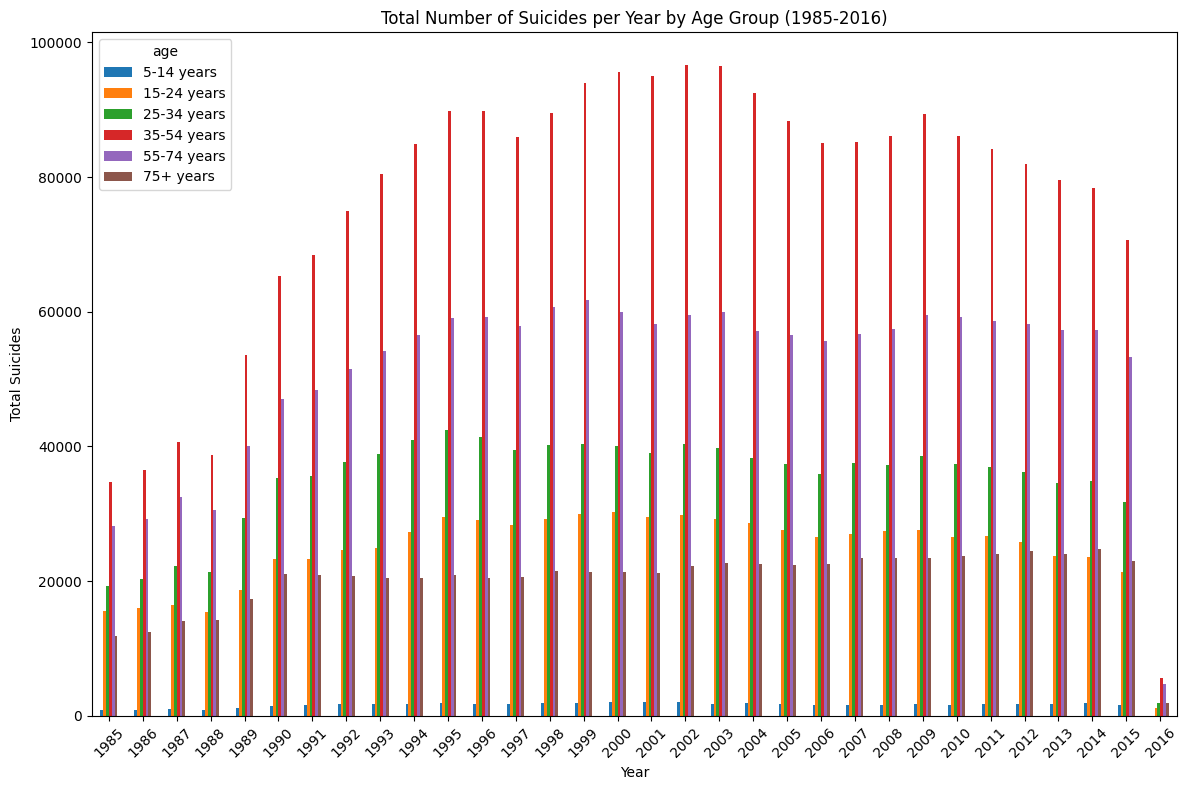

In [15]:
suicides_by_year_age = df.groupby(['year', 'age'])['suicides_no'].sum().reset_index()

pivot_age = suicides_by_year_age.pivot(index='year', columns='age', values='suicides_no')

age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']


pivot_age = pivot_age.reindex(columns=age_order)


pivot_age.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title('Total Number of Suicides per Year by Age Group (1985-2016)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5-14 year age group has the least suicide count, 35-54 year age group has the maximum. Interestingly each bar looks like a unimodal distribution, increases and reaches max at (35-54) and decreases till 75+ year group.

## Frequency Histograms

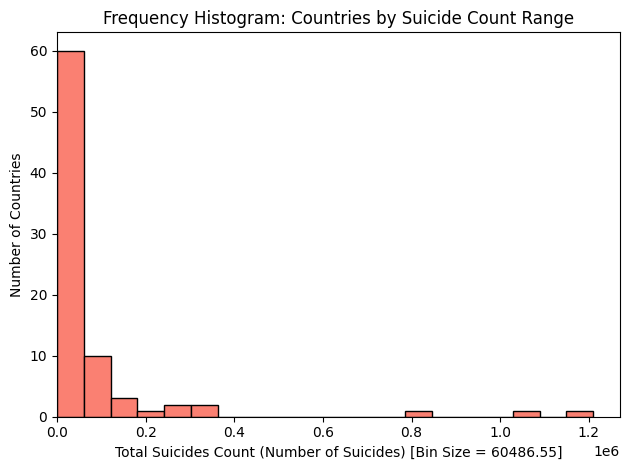

In [16]:
data = suicides_by_country['suicides_no']

counts, bin_edges, patches = plt.hist(data, bins=20, color='salmon', edgecolor='black')
bin_width=bin_edges[1]-bin_edges[0]

plt.xlabel(f'Total Suicides Count (Number of Suicides) [Bin Size = {bin_width}]')
plt.ylabel('Number of Countries')
plt.title('Frequency Histogram: Countries by Suicide Count Range')
plt.xlim(0, data.max() + bin_width)
plt.tight_layout()
plt.show()

Most of the countries have less than 60k suicide count

## Pie Charts

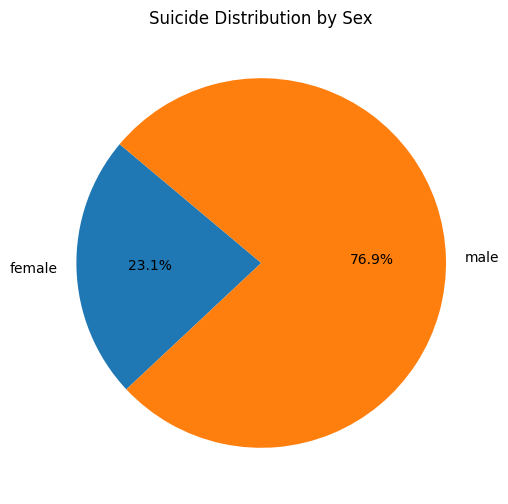

In [17]:
# Pie Chart for Suicide Distribution by Sex
sexes = ['male', 'female']
plt.figure(figsize=(6, 6))
sex_group_data = df.groupby('sex')['suicides_no'].sum()
plt.pie(sex_group_data, labels=sex_group_data.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Suicide Distribution by Sex')
plt.show()

Males account for a significantly higher proportion of suicides (76.9%) compared to females (23.1%).

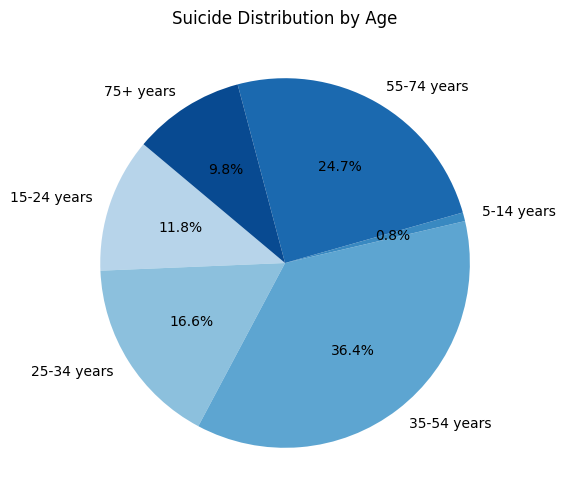

In [18]:
# Pie Chart for Suicide Distribution by Age
age_group_data = df.groupby('age')['suicides_no'].sum()
colors = cm.Blues(np.linspace(0.3, 0.9, len(age_group_data)))
plt.figure(figsize=(6, 6))
plt.pie(age_group_data, labels=age_group_data.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title(f'Suicide Distribution by Age')
plt.show()

The 35-54 age group has the highest suicide proportion (36.4%), followed by 55-74 years (24.7%), while suicides among children (5-14 years) are the lowest (0.8%).

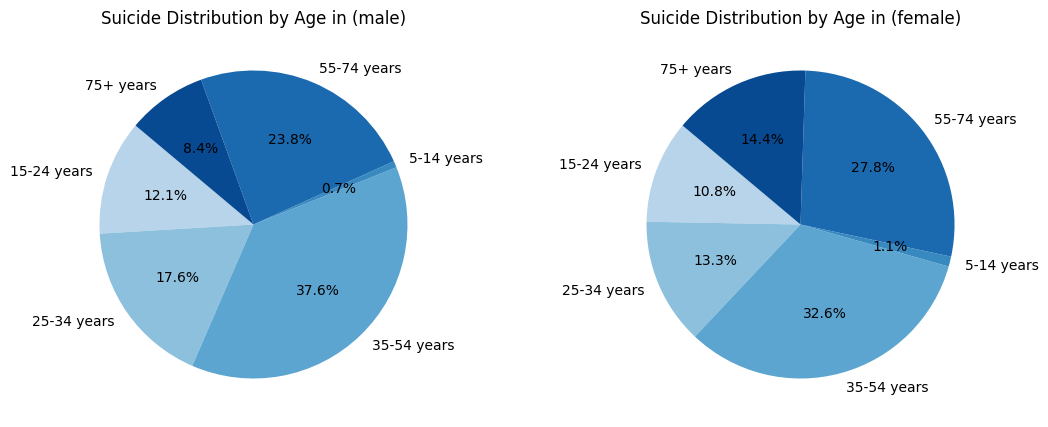

In [19]:
# Pie Chart for Suicide Distribution by Age by Gender
sexes = ['male', 'female']
plt.figure(figsize=(20, 5))

for i, sex in enumerate(sexes, 1):
  filtered_df = df[(df['sex'] == sex)]
  age_group_data = filtered_df.groupby('age')['suicides_no'].sum()
  plt.subplot(1, 3, i)
  plt.pie(age_group_data, labels=age_group_data.index, autopct='%1.1f%%', startangle=140, colors=colors)
  plt.title(f'Suicide Distribution by Age in ({sex})')

Males have a higher proportion of suicides in the 35-54 age group (37.6%) compared to females (32.6%), while females have a higher proportion in the 55-74 (27.8%) and 75+ (14.4%) age groups.

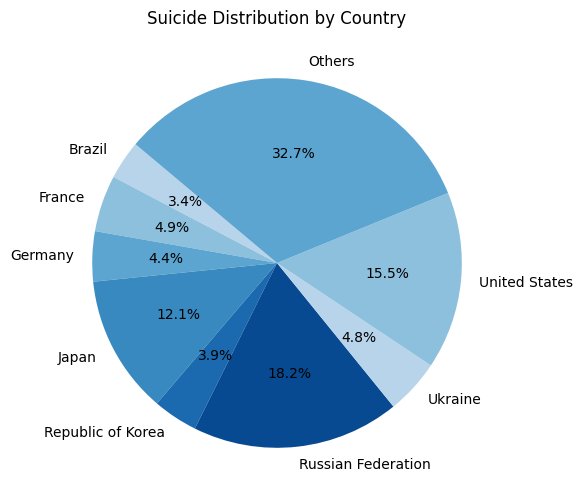

In [20]:
# Pie chart for country distribution with filtering
plt.figure(figsize=(6, 6))
country_group_data = df.groupby('country')['suicides_no'].sum()
total_suicides = country_group_data.sum()
filtered_countries = country_group_data[country_group_data / total_suicides > 0.03]
other_countries = country_group_data[country_group_data / total_suicides <= 0.03].sum()

if other_countries > 0:
    filtered_countries['Others'] = other_countries

plt.pie(filtered_countries, labels=filtered_countries.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Suicide Distribution by Country')
plt.show()

Russia, the United States, and Japan contribute significantly to global suicides, while a large portion (32.7%) falls under "Others", indicating a widespread issue across many countries.

## Ogives

In [21]:
custom_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

C:\Users\sid78\AppData\Local\Temp\ipykernel_1712\1661903311.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_data = df.groupby('age')['suicides_no'].sum().sort_index()


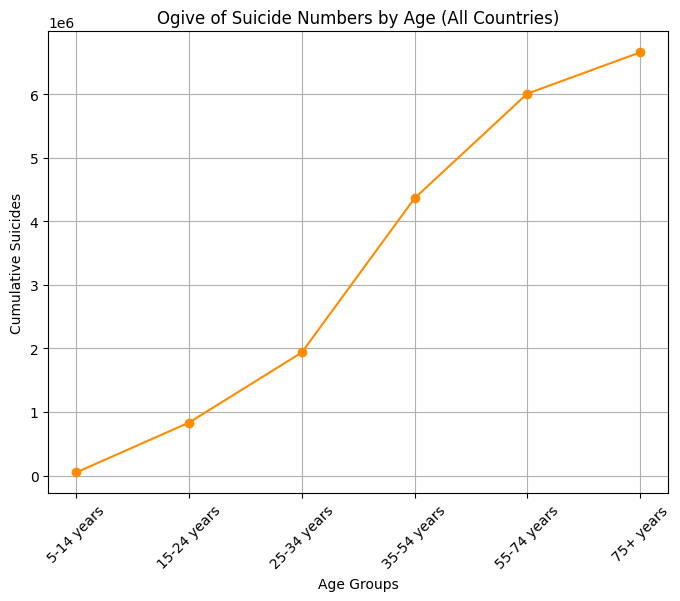

In [22]:
# Plot Ogive of Suicide Numbers by Age (All Countries)
plt.figure(figsize=(8, 6))
df['age'] = pd.Categorical(df['age'], categories=custom_order, ordered=True)
age_group_data = df.groupby('age')['suicides_no'].sum().sort_index()

cumulative_freq = np.cumsum(age_group_data)

plt.plot(age_group_data.index, cumulative_freq, marker='o', linestyle='-', color='darkorange')
plt.xlabel('Age Groups')
plt.ylabel('Cumulative Suicides')
plt.title('Ogive of Suicide Numbers by Age (All Countries)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Suicide numbers increase cumulatively with age, showing steeper jumps around the middle age intervals. This indicates higher level of suicide counts around these ages.

C:\Users\sid78\AppData\Local\Temp\ipykernel_1712\3089355525.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_data = df[df['country'] == country].groupby('age')['suicides_no'].sum().sort_index()


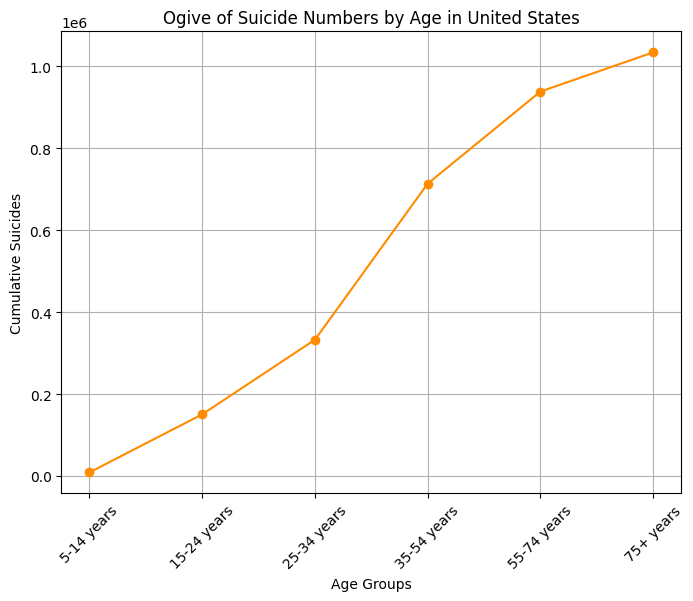

In [23]:
# Plot Ogive of Suicide Numbers by Age for a given country (Eg: United States, here)
def plot_ogive(df, country): 
  plt.figure(figsize=(8, 6))
  age_group_data = df[df['country'] == country].groupby('age')['suicides_no'].sum().sort_index()
  cumulative_freq = np.cumsum(age_group_data)

  plt.plot(age_group_data.index, cumulative_freq, marker='o', linestyle='-', color='darkorange')
  plt.xlabel('Age Groups')
  plt.ylabel('Cumulative Suicides')
  plt.title(f'Ogive of Suicide Numbers by Age in {country}')
  plt.xticks(rotation=45)
  plt.grid()
  plt.show()

country = "United States"
plot_ogive(df, country)

## Box Plots

Quartiles:
0.25     3483.0
0.50    14383.0
0.75    62761.0
Name: suicides_no, dtype: float64
Min: 11, Max: 1209742


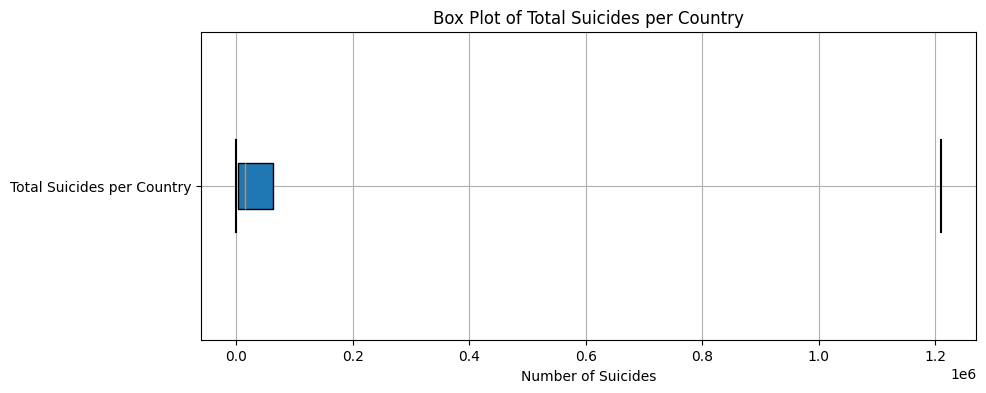

In [24]:
# Plot Box Plot of Total Suicides per Country
country_suicide_data = df.groupby('country')['suicides_no'].sum()
quartiles = country_suicide_data.quantile([0.25, 0.5, 0.75])
min_val = country_suicide_data.min()
max_val = country_suicide_data.max()

print("Quartiles:")
print(quartiles)
print(f"Min: {min_val}, Max: {max_val}")

plt.figure(figsize=(10, 4))
box = plt.boxplot(country_suicide_data, vert=False, patch_artist=True, showfliers=False, showcaps=False, whiskerprops={'visible': False})

plt.plot([min_val, min_val], [0.85, 1.15], color='black', linestyle='-', linewidth=1.5)
plt.plot([max_val, max_val], [0.85, 1.15], color='black', linestyle='-', linewidth=1.5)

plt.yticks([1], ['Total Suicides per Country'])
plt.xlabel('Number of Suicides')
plt.title('Box Plot of Total Suicides per Country')
plt.grid()
plt.show()


The box plot shows significant variability in suicide counts across countries, with extreme outliers indicating a few countries with exceptionally high numbers.

Quartiles:
0.25     5.846004
0.50    11.687521
0.75    19.488936
Name: suicides/100k pop, dtype: float64
Min: 0.5217637410680055, Max: 40.41540809370159


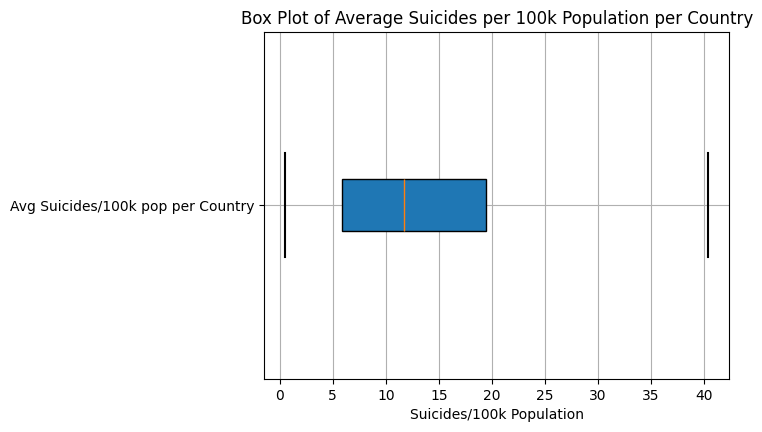

In [25]:
# Plot box Plot of Average Suicides per 100k Population per Country
country_avg_suicides = df.groupby('country')['suicides/100k pop'].mean()
quartiles = country_avg_suicides.quantile([0.25, 0.5, 0.75])
min_val = country_avg_suicides.min()
max_val = country_avg_suicides.max()

print("Quartiles:")
print(quartiles)
print(f"Min: {min_val}, Max: {max_val}")

plt.figure(figsize=(6, 4.5))
box = plt.boxplot(country_avg_suicides, vert=False, patch_artist=True, showfliers=False, showcaps=False, whiskerprops={'visible': False})

plt.plot([min_val, min_val], [0.85, 1.15], color='black', linestyle='-', linewidth=1.5)
plt.plot([max_val, max_val], [0.85, 1.15], color='black', linestyle='-', linewidth=1.5)

plt.yticks([1], ['Avg Suicides/100k pop per Country'])
plt.xlabel('Suicides/100k Population')
plt.title('Box Plot of Average Suicides per 100k Population per Country')
plt.grid()
plt.show()


The box plot indicates that the average suicide rate per 100k population varies significantly across countries, with potential outliers at both ends.

The second box plot (suicides per 100k population) provides a fairer comparison as compared the first plot, showing a more balanced distribution and highlighting countries with high suicide prevalence rather than just large total numbers (which are biased due to population size differences).

# Part 2

## Mean and Median

In [26]:
# Mean and Median of Total Suicides per Country
country_suicide = df.groupby('country')['suicides_no'].sum()
mean_value = country_suicide.mean()
median_value = country_suicide.median()

print("Mean of Suicides per Country:", mean_value)
print("Median of Suicides per Country:", median_value)

Mean of Suicides per Country: 82171.6049382716
Median of Suicides per Country: 14383.0


The mean (82171.6) is significantly higher than the median (14383.0), indicating a **right-skewed distribution** — a few countries have extremely high suicide counts driving the average up.

In [27]:
# Mean and Median of Suicide rates, Suicides/100k per Country
country_suicide_rate = df.groupby('country')['suicides/100k pop'].mean()
overall_mean = country_suicide_rate.mean()
overall_median = country_suicide_rate.median()

print("Average Suicides per 100k Population per Country:")
print(country_suicide_rate)
print("Overall Mean of Suicides per 100k Population:", overall_mean)
print("Overall Median of Suicides per 100k Population:", overall_median)

Average Suicides per 100k Population per Country:
country
Albania                 3.502848
Antigua and Barbuda     0.552901
Argentina              10.469413
Armenia                 3.276042
Australia              12.992941
                         ...    
Ukraine                26.582212
United Kingdom          7.502473
United States          13.819716
Uruguay                19.461464
Uzbekistan              8.099165
Name: suicides/100k pop, Length: 81, dtype: float64
Overall Mean of Suicides per 100k Population: 13.280364796856432
Overall Median of Suicides per 100k Population: 11.68752113544306


The overall mean (13.28) is higher than the median (11.6875), again showing **right-skewed distribution**.

In [28]:
# Mean and Median of Total Suicides per Year
year_suicide = df.groupby('year')['suicides_no'].sum()
mean_value = year_suicide.mean()
median_value = year_suicide.median()

print("Mean of Suicides per Year:", mean_value)
print("Median of Suicides per Year:", median_value)

Mean of Suicides per Year: 207996.875
Median of Suicides per Year: 231714.0


The overall mean (207996.875) is lower than the median (231714.0), showing **left-skewed distribution**.

In [29]:
# Mean and Median of Total Suicides per Country
year_suicide_rate = df.groupby('year')['suicides/100k pop'].mean()
mean_value = year_suicide_rate.mean()
median_value = year_suicide_rate.median()

print("Mean of Suicide Rates(suicides/100k) per Year:", mean_value)
print("Median of Suicide Rates(suicides/100k) per Year:", median_value)

Mean of Suicide Rates(suicides/100k) per Year: 13.174964214025952
Median of Suicide Rates(suicides/100k) per Year: 12.97309261557641


A bit suprisingly (as compared to the suicide counts per year), the overall mean in this case is higher than the median, that is, it is indicating a **right-skewed distribution**. The reason for this could be the changing population in countries over the years. 

## Quartiles

We shall compare the quartile values along with minimum and maximum values to make useful inferences.

In [30]:
quartiles = country_suicide.quantile([0.25, 0.5, 0.75])
print("Quartiles for Suicides per Country:")
print(quartiles)

m = country_suicide.min()
M = country_suicide.max()
print("Min: ",m)
print("Max: ",M)

Quartiles for Suicides per Country:
0.25     3483.0
0.50    14383.0
0.75    62761.0
Name: suicides_no, dtype: float64
Min:  11
Max:  1209742


The number of suicides per country is wide-ranged from 11 to 1,209,742. The distribution is right-skewed as Q3 is much closer to the median than the max, suggesting the presence of extreme outliers (eg., large-population countries with high suicide counts).

In [31]:
quartiles = country_suicide_rate.quantile([0.25, 0.5, 0.75])
print("Quartiles for Suicide Rates per Country:")
print(quartiles)

m = country_suicide_rate.min()
M = country_suicide_rate.max()
print("Min: ",m)
print("Max: ",M)

Quartiles for Suicide Rates per Country:
0.25     5.846004
0.50    11.687521
0.75    19.488936
Name: suicides/100k pop, dtype: float64
Min:  0.5217637410680055
Max:  40.41540809370159


Suicide rates per 100k population range widely from 0.52 to 40.41, with a median of 11.69. The distribution is right-skewed, indicating some countries have significantly higher suicide rates(maybe due to extreme differences in lifestyles and living environments).

In [32]:
quartiles = year_suicide.quantile([0.25, 0.5, 0.75])
print("Quartiles for Suicides per Year:")
print(quartiles)

m = year_suicide.min()
M = year_suicide.max()
print("Min: ",m)
print("Max: ",M)

Quartiles for Suicides per Year:
0.25    200767.75
0.50    231714.00
0.75    241055.25
Name: suicides_no, dtype: float64
Min:  15076
Max:  250358


Annual suicides range drastically from 15,076 to 250,358, with a median of 231,714. The data shows a relatively narrow spread above the median, suggesting consistency in yearly suicide numbers. The drastic range could be due to population growth

In [33]:
quartiles = year_suicide_rate.quantile([0.25, 0.5, 0.75])
print("Quartiles for Suicide Rates per Year:")
print(quartiles)

m = year_suicide_rate.min()
M = year_suicide_rate.max()
print("Min: ",m)
print("Max: ",M)

Quartiles for Suicide Rates per Year:
0.25    12.070272
0.50    12.973093
0.75    14.195253
Name: suicides/100k pop, dtype: float64
Min:  10.726930704634128
Max:  15.883556553809065


Annual suicide rates per 100k population range from 10.73 to 15.88, with a median of 12.97. The narrow spread suggests relatively stable suicide rates across years. This can be contrasted with the absolute suicide count numbers, to further confirm our guess regarding drastic value ranges, accounting to population growth and other potential factors.

## Measures of Dispersion

In [34]:
# Function to compute dispersion measures for a given series
def compute_dispersion(series):
    series = series.dropna()
    return {
        'Min': series.min(),
        'Max': series.max(),
        'Range': series.max() - series.min(),
        'Variance': series.var(),
        'Std Deviation': series.std(),
        'IQR': series.quantile(0.75) - series.quantile(0.25)
    }

In [35]:
cols_of_interest = ['suicides_no', 'suicides/100k pop']

dispersion_stats = {}
for col in cols_of_interest:
    dispersion_stats[col] = compute_dispersion(df[col])

dispersion_stats_df = pd.DataFrame(dispersion_stats)
print("Dispersion Measures per year per country:")
display(HTML(dispersion_stats_df.to_html()))

Dispersion Measures per year per country:


,suicides_no,suicides/100k pop
Min,0.000000,0.000000
Max,22338.000000,204.918033
Range,22338.000000,204.918033
Variance,863687.246293,362.337571
Std Deviation,929.347753,19.035167
IQR,138.000000,16.202018


1. Suicide Numbers
- Range indicates large disparity between countries in terms of suicide count. Could be due to the different population sizes and change over the years.
- Variance indicates high variability in total suicides per country per year.
- Standard Deviation indicates large spread, like the variance.
- IQR (Interquartile Range): 138 indicating very close values and less dispersion at the middle 50% of values.

2. Suicides per 100k Population (suicides/100k pop)
- Range indicates huge disparity in suicide rates across different countries and over the years.
- Variance suggests considerable variation in suicide rates per 100k population across countries and years.
- Standard Deviation indicates high spread in suicide rates, as variance.
- IQR: 16.2 indicates middle 50% of countries have suicide rates within 15.7 per 100k, which on reviewing against the range is pretty low. This indicates closer values at the middle 50% of values.

In [36]:
# Suicides per Year ---
suicides_by_year = df.groupby('year')['suicides_no'].sum().reset_index()
disp_year = compute_dispersion(suicides_by_year['suicides_no'])

#Suicides per Country ---
suicides_by_country = df.groupby('country')['suicides_no'].sum().reset_index()
disp_country = compute_dispersion(suicides_by_country['suicides_no'])

disp_table = {
    'Suicides per Year': disp_year,
    'Suicides per Country': disp_country
}

disp_df = pd.DataFrame(disp_table).T

disp_df = disp_df.round(2)

print("Combined Dispersion Measures Table:")
display(HTML(disp_df.to_html()))

Combined Dispersion Measures Table:


,Min,Max,Range,Variance,Std Deviation,IQR
Suicides per Year,15076.0,250358.0,235282.0,2.964439e+09,54446.67,40287.5
Suicides per Country,11.0,1209742.0,1209731.0,4.023222e+10,200579.72,59278.0


Inference from Combined Dispersion Measures Table
1. Suicide count per Year
- Range: 235282.0 indicates huge difference in annual suicides across different years. Could be due to change in world affairs and lifestyles.
- Variance: 2.96 billion indicates extremely high variation in suicides per year.
- Standard Deviation: 54446.67 indicates significant spread in annual suicide counts.
- IQR: 40287.5 indicates middle 50% of annual suicide counts have are with this value difference, indicating a decent variation of suicide count over time.
  
2. Suicide count per Country
- Range: 1209731.0 indicates huge disparity among countries. Could be due to difference in population sizes.
- Variance: 40.23 billion indicates extreme variation in suicide numbers per country.
- Standard Deviation: 200579.72 indicates some countries have drastically higher suicides than others.
- IQR: 59278.0 indicates middle 50% of countries and when reviewed with the range, the values have a large spread in suicide counts.

In [37]:
# Suicides per Year ---
suicides_by_year = df.groupby('year')['suicides/100k pop'].mean().reset_index()
disp_year = compute_dispersion(suicides_by_year['suicides/100k pop'])

#Suicides per Country ---
suicides_by_country = df.groupby('country')['suicides/100k pop'].mean().reset_index()
disp_country = compute_dispersion(suicides_by_country['suicides/100k pop'])

disp_table = {
    'Suicides/100k per Year': disp_year,
    'Suicides/100k per Country': disp_country
}
disp_df = pd.DataFrame(disp_table).T

disp_df = disp_df.round(2)

print("Combined Dispersion Measures Table:")
display(HTML(disp_df.to_html()))

Combined Dispersion Measures Table:


,Min,Max,Range,Variance,Std Deviation,IQR
Suicides/100k per Year,10.73,15.88,5.16,1.81,1.34,2.12
Suicides/100k per Country,0.52,40.42,39.89,84.35,9.18,13.64


Inference from Combined Dispersion Measures Table
1. Suicides/100k per Year
- Range: 5.16 indicates a moderate difference in suicide rates over the years.
- Variance: 1.81 suggests a relatively low variation in suicide rates across years.
- Standard Deviation: 1.34 reinforces that yearly fluctuations are not very extreme.
- IQR: 2.12 indicates decent yet relatively consistent spread of the mid 50% of values.
  
2. Suicides/100k per Country
- Range: 40.42 indicates huge disparity in suicide rates per country over the years.
- Variance: 39.89 indicates extreme variation in suicide rate per country.
- Standard Deviation: 84.35 indicates high spread in suicide rates per country.
- IQR: 13.64 indicates decent spread of the mid 50% of values.

### Summarizing the Measures and Inferences:
- #### Suicide numbers alone do not give the full picture due to population size differences — comparing suicides per 100k population provides a normalized metric. Hence, we have compared these values as well to contrast aside the suicide counts.
- #### Extreme disparities exist— some countries have very high suicide rates, while others report zero suicides i.e. the range is very high(range of 39.89 for suicide/100k). Might indicate extreme differences in lifestyles and living environments across countries.
- #### High standard deviation and variance suggest significant fluctuations in suicide rates between countries, this can by seen by observing that mean is significantly lower than the standard deviation of number of suicides per country.
- #### The middle 50% of countries have relatively lower suicides, but the max values are extreme, indicating outliers with exceptionally high suicide rates.
- #### The suicide counts as well as suicide rates across countries display a right-skewed distribution, with a few countries have extremely high suicide counts driving the average up. This aligns with the inference above regarding high-valued outliers.
- #### Suicide counts across countries are also widely different, but this can be accounted to wide difference in population sizes.
- #### Some countries have zero suicides reported, indicating possible missing data, underreporting, this could indicate the data we collected, and consequentially, the satistics we computed are slighly biased.
- #### Suicide rates are **relatively** more consistent over time(across the years) than across countries-showing huge variation.
- #### The suicide rate per 100k shows variation but remains within a relatively controlled range(5.16).
- #### The absolute number of suicides per year has massive fluctuations, likely influenced by population growth, external societal factors, and reporting changes. Hence, while suicide rates fluctuate within a limited range, the absolute number of suicides can vary dramatically.

#### Overall,
- #### Suicide counts and rates show significant disparities across countries, with a right-skewed distribution driven by extreme outliers. Absolute suicide numbers vary widely across countries due to population differences, while suicide rates per 100k provide a more normalized comparison.
- #### Despite fluctuations, suicide rates remain relatively stable over time, whereas absolute suicide counts vary quite a bit, influenced by population growth, societal factors, and potential reporting biases.

# Part 3

## Central Limit Theorem (CLT) Simulations with Suicide Data
The goal of this section of the assignment is to demonstrate the **Central Limit Theorem (CLT)** using real-world data on suicides. We will:

1. Load and clean the data (as done above).
3. Aggregate suicide counts by country and year.
4. Visualize the distribution of suicide counts per country-year.
5. Perform **CLT simulation** by taking random samples and analyzing their means.

---------------------------------------------------------------------------------------------------------------------------------------------

- The information from this dataset we care about for the simulations are the suicides per country per year, broken down by age group and sex.
- We will aggregate this data to analyze total suicides per country-year.

---------------------------------------------------------------------------------------------------------------------------------------------

## Aggregating Suicide Counts and Plotting Distributions
We will:

- Group by country-year and age, summing up the suicides_no column.
- Also, create another dataset aggregating just by country-year.

In [ ]:
# Aggregate suicides per country-year and per age group
suicides_cty_year_age = df.groupby(by=['country-year', 'age'], as_index=False)['suicides_no'].sum()
suicides_cty_year = df.groupby(by=['country-year'], as_index=False)['suicides_no'].sum()

suicides_cty_year.head()

C:\Users\sid78\AppData\Local\Temp\ipykernel_1712\1041425142.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  suicides_cty_year_age = df.groupby(by=['country-year', 'age'], as_index=False)['suicides_no'].sum()


,country-year,suicides_no
0,Albania1987,73
1,Albania1988,63
2,Albania1989,68
3,Albania1992,47
4,Albania1993,73


In [39]:
suicides_cty_year_age.head()

,country-year,age,suicides_no
0,Albania1987,5-14 years,0
1,Albania1987,15-24 years,35
2,Albania1987,25-34 years,13
3,Albania1987,35-54 years,22
4,Albania1987,55-74 years,1


We now plot a histogram of suicide counts per country-year.

**IMPORTANT NOTE:** The below histogram has multiple bins each of size dx (= 20), which shows the number of country-year pairs that fall in each range.
Eg. If there are only two pairs, Australia2001, Morocco2005 that have suicides counts between 20-40, the height of that bin will be 2. 

0
61420
[  -1   19   39   59   79   99  119  139  159  179  199  219  239  259
  279  299  319  339  359  379  399  419  439  459  479  499  519  539
  559  579  599  619  639  659  679  699  719  739  759  779  799  819
  839  859  879  899  919  939  959  979  999 1019 1039 1059 1079 1099
 1119 1139 1159 1179 1199 1219 1239 1259 1279 1299 1319 1339 1359 1379
 1399 1419 1439 1459 1479 1499 1519 1539 1559 1579 1599 1619 1639 1659
 1679 1699 1719 1739 1759 1779 1799 1819 1839 1859 1879 1899 1919 1939
 1959 1979 1999 2019 2039 2059 2079 2099 2119 2139 2159 2179 2199 2219
 2239 2259 2279 2299]


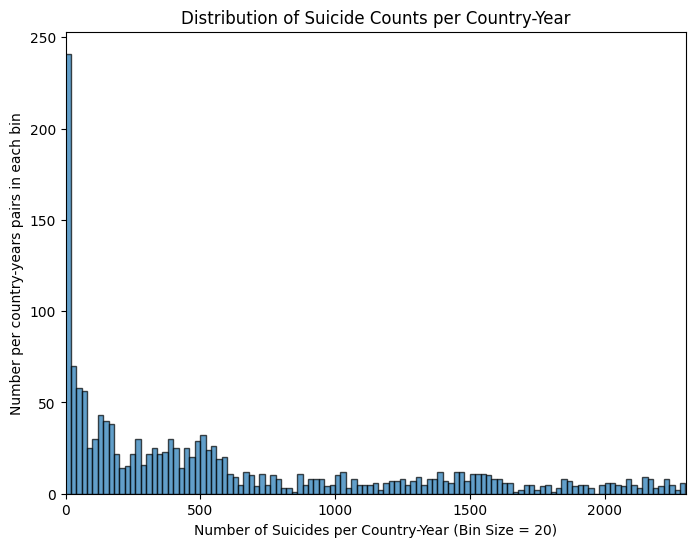

In [ ]:
dx = 20
xlimit = 2300


xvalues = np.array(suicides_cty_year['suicides_no'])
xbins = np.arange(min(xvalues) - 1, xlimit, dx)
print(min(xvalues))
print(max(xvalues))
print(xbins)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(xvalues, bins=xbins, edgecolor='black', alpha=0.7)
ax.set_xlim((0, xlimit))
ax.set_ylabel('Number per country-years pairs in each bin')
ax.set_xlabel(f'Number of Suicides per Country-Year (Bin Size = {dx})')
ax.set_title("Distribution of Suicide Counts per Country-Year")
plt.show()

The above is the distribution of the no. of suicides per country per year with each bin being size 20.

In [ ]:
# Define function to get frequency within a range
def get_freq(array, low, high):
    return np.sum((array >= low) & (array < high)) / len(array)

# Frequency Calculation
bin_width = 50
bins = range(0, 25000, bin_width)
total_freq = 0
results = []

for i in bins:
    freq = get_freq(xvalues, i, i + bin_width)
    total_freq += freq
    if freq > 0.005:
        results.append([f"{i}-{i + bin_width}", freq, total_freq])

df_freq = pd.DataFrame(results, columns=["Range", "Frequency", "Cumulative Frequency"])

print(df_freq.to_string(index=False))

    Range  Frequency  Cumulative Frequency
     0-50   0.157701              0.157701
   50-100   0.051034              0.208736
  100-150   0.043678              0.252414
  150-200   0.034483              0.286897
  200-250   0.018851              0.305747
  250-300   0.025287              0.331034
  300-350   0.024828              0.355862
  350-400   0.031724              0.387586
  400-450   0.022989              0.410575
  450-500   0.028966              0.439540
  500-550   0.034483              0.474023
  550-600   0.021149              0.495172
  600-650   0.009195              0.504368
  650-700   0.011954              0.516322
  700-750   0.008736              0.525057
  750-800   0.008736              0.533793
  850-900   0.007356              0.544368
  900-950   0.009655              0.554023
 950-1000   0.005977              0.560000
1000-1050   0.010575              0.570575
1050-1100   0.006897              0.577471
1100-1150   0.005057              0.582529
1150-1200  

This is the reason 2300 was chosen as the limit to plot the histogram. As the values extend till 61000, we limit it here for better visualization.

## CLT Simulation
### What is CLT?
The Central Limit Theorem states that if we take random samples of a large enough size from any distribution:

- The sample means will be normally distributed, even if the original population is not.
- The larger the sample size, the closer the distribution of sample means gets to a normal distribution.

### How We Apply CLT Here:
1. We take random samples from xvalues (suicide counts per country-year).
2. Each sample contains num_samples randomly chosen values.
3. We compute the mean of each sample.
4. We repeat this many times to form a distribution of sample means.

In [ ]:
print(f"Size of the dataset: {len(xvalues)}")
print(f"Population mean: {xvalues.mean():.2f}")

# Sample sizes to test
sample_sizes = [30, 50, 100, 200, 500, 1000]
num_samples = 1000  

sample_means = {
    size: np.mean(np.random.choice(xvalues, size=(num_samples, size), replace=True), axis=1)
    for size in sample_sizes
}

Size of the dataset: 2175
Population mean: 3060.18


In [43]:
# Compute common x-axis range
x_min = min(min(means) for means in sample_means.values())
x_max = max(max(means) for means in sample_means.values())
bins = np.linspace(x_min, x_max, 30)  # Fixed bin range

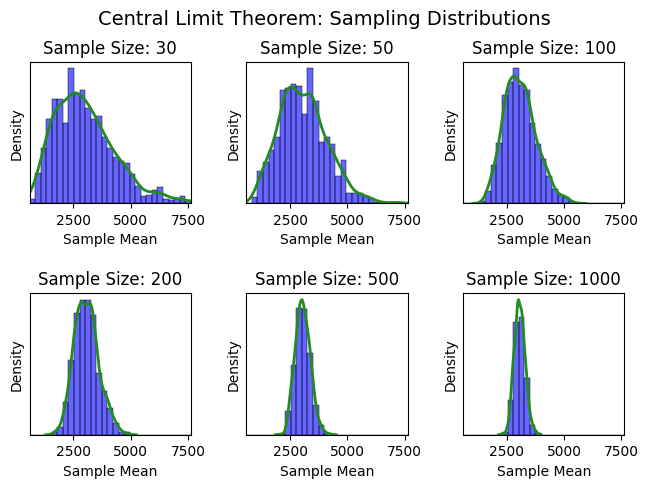

In [44]:
# Plotting sampling distributions
fig, axes = plt.subplots(2, 3, layout = 'constrained')
fig.suptitle("Central Limit Theorem: Sampling Distributions", fontsize=14)

for ax, size in zip(axes.flat, sample_sizes):
    sns.histplot(sample_means[size], bins=bins, ax=ax, stat="density", color="blue", edgecolor="black", alpha=0.6)
    sns.kdeplot(data=sample_means[size], color='forestgreen', ax=ax, linewidth = 2)
    ax.set_title(f"Sample Size: {size}")
    ax.set_xlim(x_min, x_max)
    ax.set_yticks([])
    ax.set_xlabel("Sample Mean")
    ax.set_ylabel("Density")

fig.get_layout_engine().set(w_pad=4 / 72, h_pad=4 / 72, hspace=0.1,
                            wspace=0.1)
plt.show()

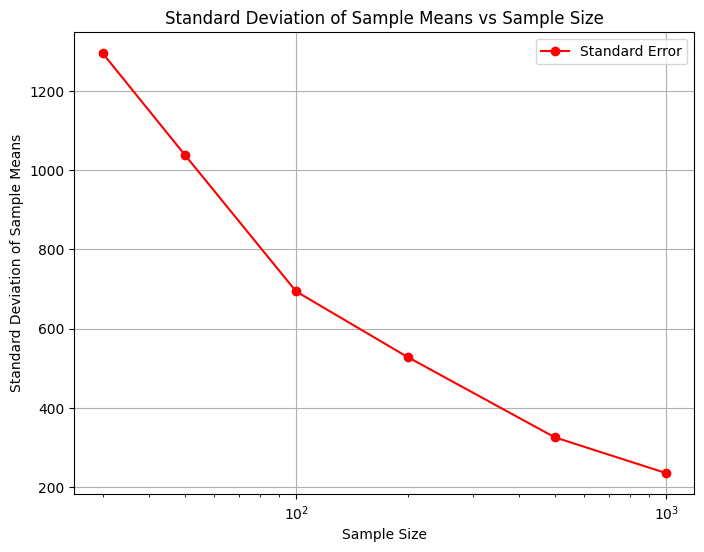

In [ ]:
# Compute standard deviation of sample means (Standard Error)
std_errors = [np.std(sample_means[size]) for size in sample_sizes]

# Plot standard deviation decrease
plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, std_errors, marker='o', linestyle='-', color='red', label="Standard Error")
plt.title("Standard Deviation of Sample Means vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Standard Deviation of Sample Means")
plt.xscale("log")  
plt.legend()
plt.grid()
plt.show()

### Observations:

- For small sample sizes (30, 50), the distribution of sample means is still somewhat skewed.
- As the sample size increases, the distribution of sample means becomes more normal (and as predicted, the standard deviations are reducing).
- When the sample size is 1000, the distribution is almost perfectly normal.

## Age-Group Specific CLT
Let's simulate CLT one more time for suicide numbers, but focus individually at each age group.

In [ ]:
age_groups = ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]
sample_sizes = [30, 50, 100, 200, 500, 1000]  # Different sample sizes to test
num_samples = 1000  # Number of samples per size


age_colors = sns.color_palette("husl", len(age_groups))


sample_means_by_age = {}
population_means = {}

# Perform CLT simulation for each age group
for age, color in zip(age_groups, age_colors):
    # Filter data for current age group
    age_data = suicides_cty_year_age[suicides_cty_year_age['age'] == age]['suicides_no'].values

    # Compute population mean for this age group
    population_means[age] = np.mean(age_data)
    
    sample_means = {}
    
    # Compute sample means and stds
    for size in sample_sizes:
        choice = np.random.choice(age_data, size=(num_samples, size), replace=True)
        means = np.mean(choice, axis=1)
        sample_means[size] = means
    sample_means_by_age[age] = sample_means

Let's plot these simulations.

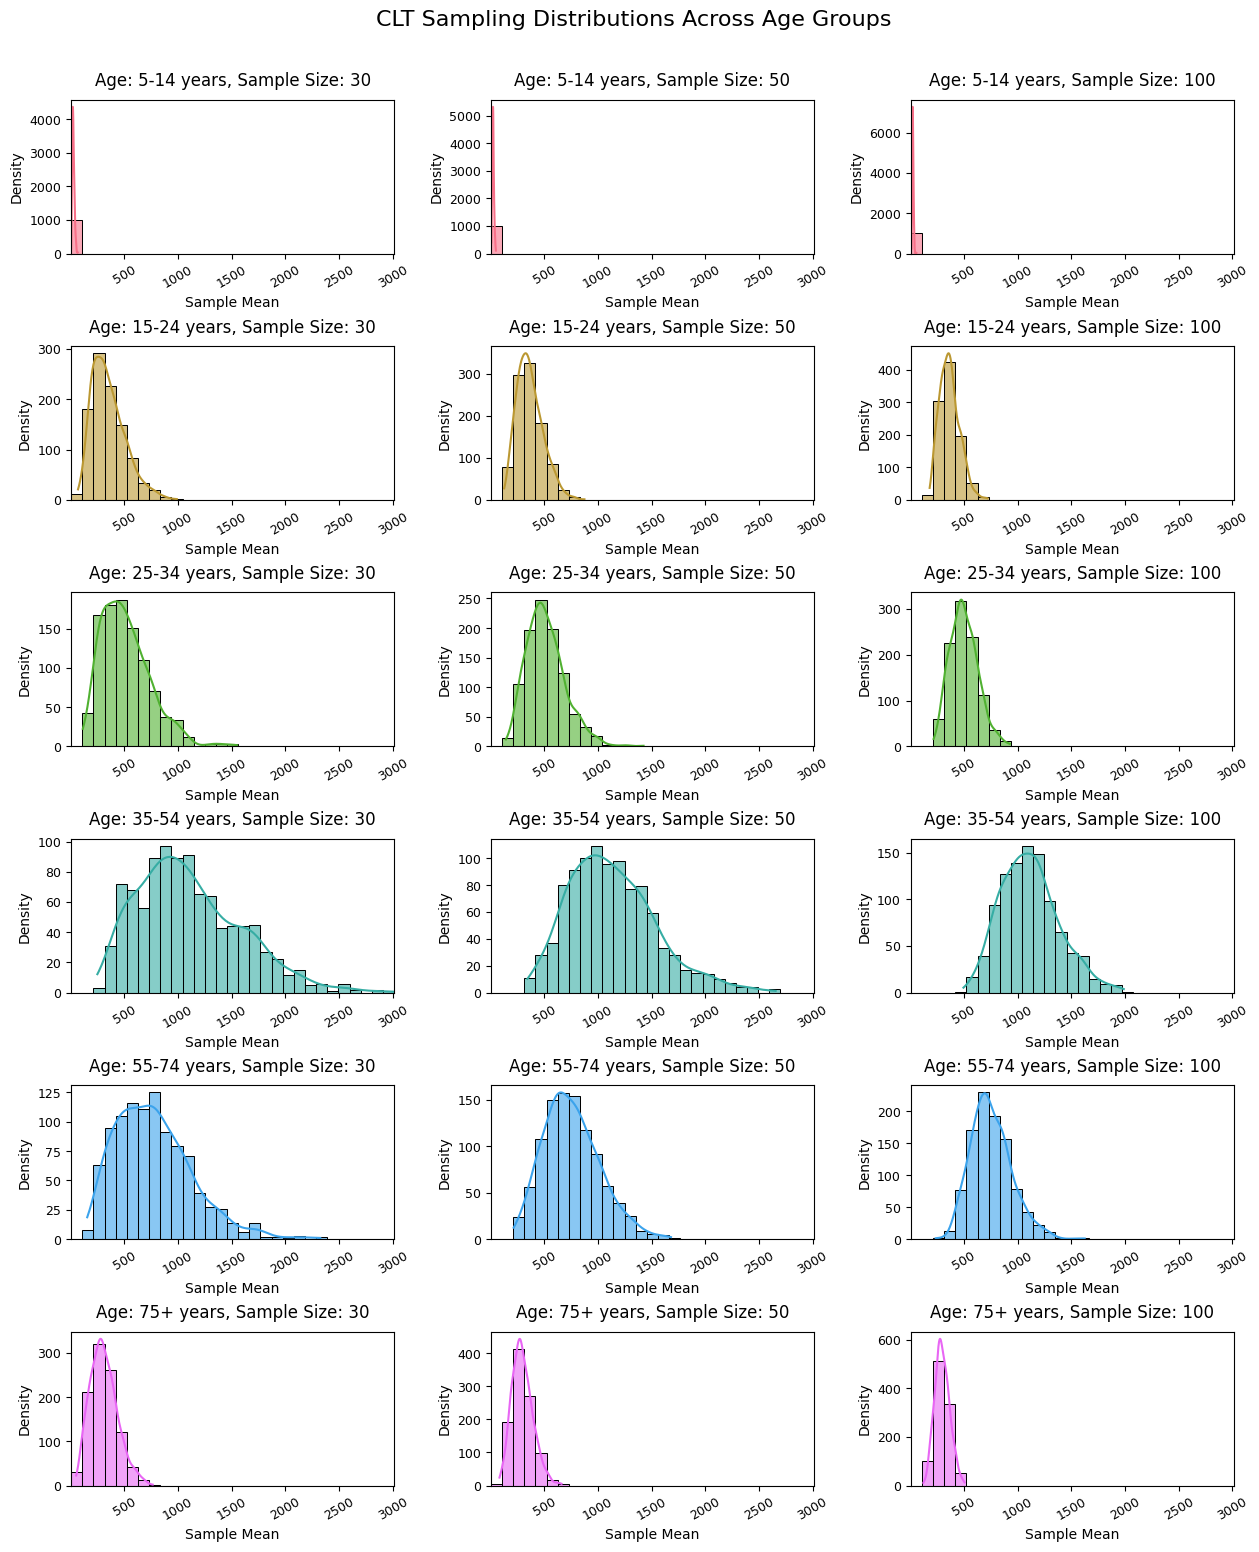


Mean of Sample Means for Each Age Group:

Age Group: 5-14 years
  Population Mean: 23.29
  Sample Size 30: 23.20 and Standard Deviation: 9.91
  Sample Size 50: 23.16 and Standard Deviation: 7.73
  Sample Size 100: 23.40 and Standard Deviation: 5.76
  Sample Size 200: 23.30 and Standard Deviation: 3.86
  Sample Size 500: 23.39 and Standard Deviation: 2.53
  Sample Size 1000: 23.28 and Standard Deviation: 1.76

Age Group: 15-24 years
  Population Mean: 360.30
  Sample Size 30: 351.94 and Standard Deviation: 154.97
  Sample Size 50: 365.87 and Standard Deviation: 121.83
  Sample Size 100: 364.81 and Standard Deviation: 92.68
  Sample Size 200: 360.70 and Standard Deviation: 64.49
  Sample Size 500: 360.31 and Standard Deviation: 40.00
  Sample Size 1000: 361.24 and Standard Deviation: 26.66

Age Group: 25-34 years
  Population Mean: 506.82
  Sample Size 30: 510.44 and Standard Deviation: 226.67
  Sample Size 50: 514.29 and Standard Deviation: 179.38
  Sample Size 100: 498.96 and Standard

In [ ]:
# Determine common x-axis range
x_min = min(min(means) for age_means in sample_means_by_age.values() for means in age_means.values())
x_max = max(max(means) for age_means in sample_means_by_age.values() for means in age_means.values())
bins = np.linspace(x_min, x_max, 30)  # Fixed bin range

# Plot Sampling Distributions for Each Age Group
fig, axes = plt.subplots(len(age_groups), 3, figsize=(15, 18))  # Increased height
fig.suptitle("CLT Sampling Distributions Across Age Groups", fontsize=16, y = 0.93)  # Adjust title position


plt.subplots_adjust(hspace=0.6, wspace=0.3) 

for i, (age, color) in enumerate(zip(age_groups, age_colors)):
    for j, size in enumerate(sample_sizes[:3]):  
        sns.histplot(sample_means_by_age[age][size], bins=bins, kde=True, ax=axes[i, j], color=color, edgecolor="black", alpha=0.6)
        axes[i, j].set_title(f"Age: {age}, Sample Size: {size}", fontsize=12, pad=10) 
        axes[i, j].set_xlim(x_min, x_max)
        axes[i, j].set_xlabel("Sample Mean", fontsize=10)
        axes[i, j].set_ylabel("Density", fontsize=10)
        axes[i, j].tick_params(axis='x', rotation=30)  
        axes[i, j].tick_params(axis='both', labelsize=9)  

plt.show()


print("\nMean of Sample Means for Each Age Group:\n")
for age in age_groups:
    mean_values = {size: np.mean(sample_means_by_age[age][size]) for size in sample_sizes}
    std_values = {size: np.std(sample_means_by_age[age][size]) for size in sample_sizes}
    print(f"Age Group: {age}")
    print(f"  Population Mean: {population_means[age]:.2f}")
    for size, mean_val in mean_values.items():
        print(f"  Sample Size {size}: {mean_val:.2f} and Standard Deviation: {std_values[size]:.2f}")
    print()


From our simulations, we observe that the Central Limit Theorem (CLT) holds well across different age groups when the population size is sufficient. For age groups with larger suicide counts, the sample means consistently form a bell-shaped, normal distribution, reinforcing the CLT’s prediction.

However, for age groups with fewer data points, the distribution of sample means shows more variability due to the limited sample space. This highlights the importance of a sufficient population size when applying CLT in real-world scenarios.

## Conclusion
Through this section, we explored the Central Limit Theorem (CLT) using real-world suicide data across different age groups. We tried to demonstrate that:

1. Regardless of the underlying population distribution, the distribution of sample means approaches normality as sample size increases.
2. For age groups with larger population counts, the normal approximation holds more strongly.
3. The variation in sample means decreases as we increase sample size, leading to a more precise estimate of the true population mean.

CLT is a powerful statistical principle that allows us to make inferences about populations even when we only have access to samples. It forms the foundation of many statistical methods, including hypothesis testing and confidence intervals.

Future work could involve:

- Investigating CLT’s behavior on other subsets of the data (e.g., by country, by year).
- Exploring how skewed distributions impact the speed at which normality emerges.

## More visualizations

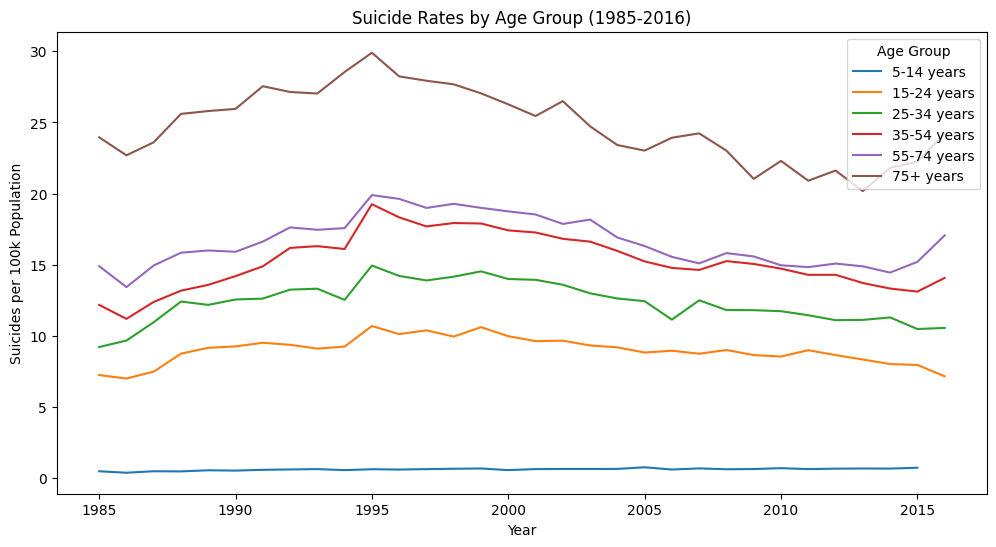

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='year', y='suicides/100k pop', hue='age', errorbar=None)
plt.xlabel("Year")
plt.ylabel("Suicides per 100k Population")
plt.title("Suicide Rates by Age Group (1985-2016)")
plt.legend(title="Age Group")
plt.show()

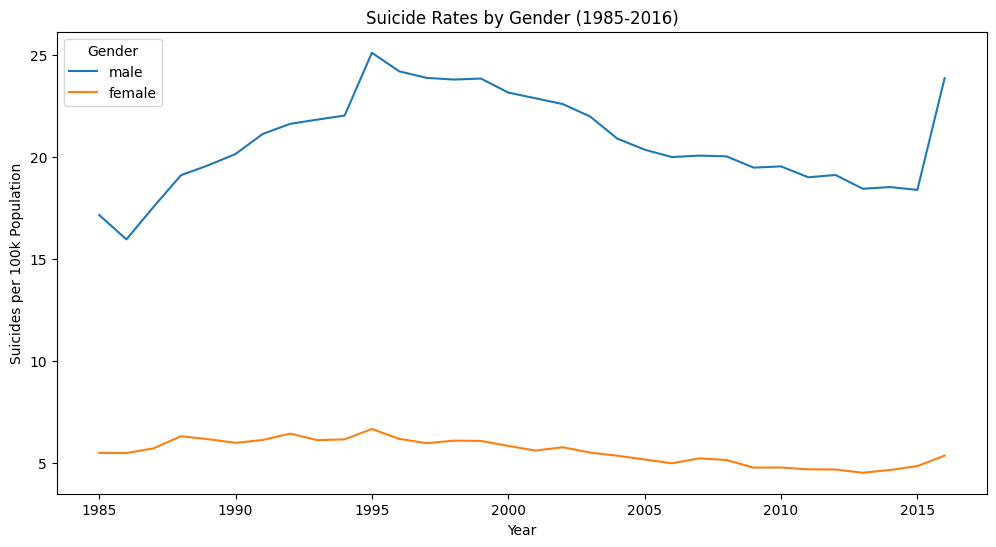

In [53]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='year', y='suicides/100k pop', hue='sex', errorbar=None)
plt.xlabel("Year")
plt.ylabel("Suicides per 100k Population")
plt.title("Suicide Rates by Gender (1985-2016)")
plt.legend(title="Gender")
plt.show()

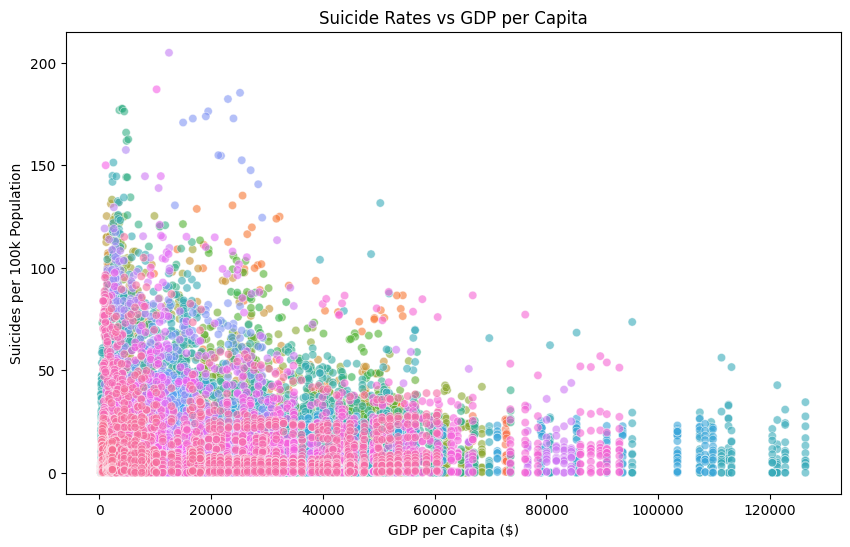

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='gdp_per_capita ($)', y='suicides/100k pop', hue='country', alpha=0.6)
plt.xlabel("GDP per Capita ($)")
plt.ylabel("Suicides per 100k Population")
plt.title("Suicide Rates vs GDP per Capita")
plt.legend([],[], frameon=False)  
plt.show()


**Thank you for reading our assigment till the end :)**

Written by Ankita Sri S P, Siddarth and Faheem.

MA23BTECH11001, MA23BTECH11017, MA23BTECH11010 respectively.